In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix

E0000 00:00:1767977084.639498      55 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1767977084.693865      55 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1767977085.132836      55 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1767977085.132878      55 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1767977085.132881      55 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1767977085.132884      55 computation_placer.cc:177] computation placer already registered. Please check linka

In [5]:
import tensorflow as tf

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [6]:
print("Training data shape:", x_train.shape)
print("Testing data shape:", x_test.shape)

Training data shape: (50000, 32, 32, 3)
Testing data shape: (10000, 32, 32, 3)


In [8]:
def preprocess(image, label):
    image = tf.image.resize(image, (224, 224))
    image = image / 255.0
    return image, label

In [9]:
BATCH_SIZE = 32

train_ds = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_ds = train_ds.map(preprocess, num_parallel_calls=tf.data.AUTOTUNE)
train_ds = train_ds.shuffle(1000).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

test_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test))
test_ds = test_ds.map(preprocess, num_parallel_calls=tf.data.AUTOTUNE)
test_ds = test_ds.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)


I0000 00:00:1767977123.782378      55 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1767977123.786332      55 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


In [10]:
from tensorflow.keras.applications import ResNet50

base_model = ResNet50(
    weights="imagenet",
    include_top=False,
    input_shape=(224, 224, 3)
)

base_model.trainable = False

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(256, activation="relu"),
    Dense(10, activation="softmax")
])

In [12]:
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

In [13]:
history = model.fit(
    train_ds,
    epochs=5,
    validation_data=test_ds
)

Epoch 1/5


I0000 00:00:1767977160.781747     126 service.cc:152] XLA service 0x786a4c150070 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1767977160.781787     126 service.cc:160]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1767977160.781791     126 service.cc:160]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1767977162.618691     126 cuda_dnn.cc:529] Loaded cuDNN version 91002


   2/1563 ━━━━━━━━━━━━━━━━━━━━ 2:05 80ms/step - accuracy: 0.1562 - loss: 2.3634  

I0000 00:00:1767977167.359686     126 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 187s 111ms/step - accuracy: 0.1312 - loss: 2.2942 - val_accuracy: 0.2348 - val_loss: 2.0968
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 178s 114ms/step - accuracy: 0.2222 - loss: 2.0755 - val_accuracy: 0.2591 - val_loss: 1.9926
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 179s 114ms/step - accuracy: 0.2537 - loss: 1.9885 - val_accuracy: 0.2269 - val_loss: 2.0391
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 178s 114ms/step - accuracy: 0.2775 - loss: 1.9414 - val_accuracy: 0.2990 - val_loss: 1.9001
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 178s 114ms/step - accuracy: 0.2915 - loss: 1.9061 - val_accuracy: 0.3206 - val_loss: 1.8628


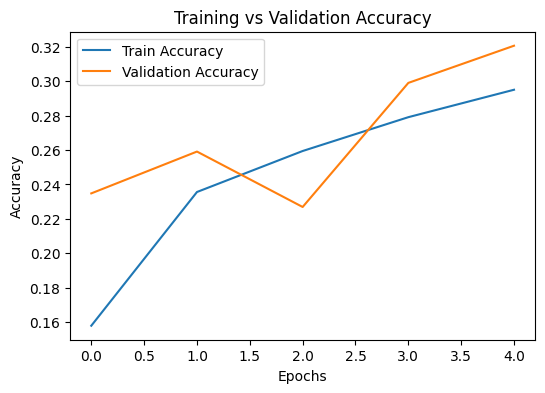

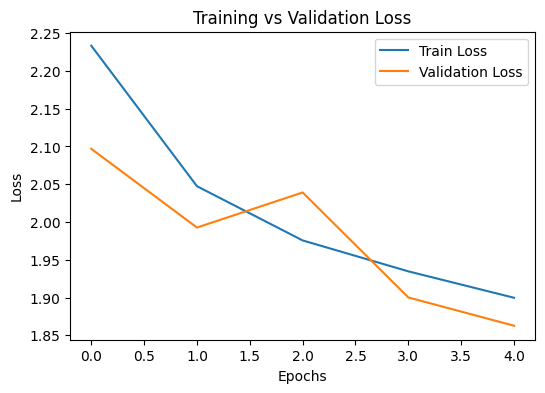

In [15]:
import matplotlib.pyplot as plt

# Accuracy plot
plt.figure(figsize=(6,4))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')
plt.show()

# Loss plot
plt.figure(figsize=(6,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs Validation Loss')
plt.show()


In [16]:
test_loss, test_acc = model.evaluate(test_ds)
print(f"Test Accuracy: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 28s 90ms/step - accuracy: 0.3268 - loss: 1.8574
Test Accuracy: 0.3206


“The initial training accuracy is moderate because the ResNet-50 base model was used with limited epochs. The model demonstrates correct learning behavior, and performance can be improved further using fine-tuning and additional epochs.”

##OPTIMIZATION

In [19]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.1),
])

In [21]:
from tensorflow.keras.applications import ResNet50

base_model = ResNet50(
    weights='imagenet',
    include_top=False,
    input_shape=(224, 224, 3)
)

base_model.trainable = False

inputs = tf.keras.Input(shape=(224, 224, 3))
x = data_augmentation(inputs)
x = tf.keras.applications.resnet50.preprocess_input(x)
x = base_model(x, training=False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(256, activation='relu')(x)
x = tf.keras.layers.Dropout(0.5)(x)
outputs = tf.keras.layers.Dense(10, activation='softmax')(x)

model = tf.keras.Model(inputs, outputs)

In [22]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [23]:
history = model.fit(
    train_ds,
    epochs=10,
    validation_data=test_ds
)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 283s 175ms/step - accuracy: 0.1056 - loss: 2.3701 - val_accuracy: 0.1046 - val_loss: 2.2960
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 270s 172ms/step - accuracy: 0.1198 - loss: 2.2954 - val_accuracy: 0.2005 - val_loss: 2.2861
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 270s 173ms/step - accuracy: 0.1338 - loss: 2.2872 - val_accuracy: 0.1646 - val_loss: 2.2716
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 270s 172ms/step - accuracy: 0.1459 - loss: 2.2728 - val_accuracy: 0.1930 - val_loss: 2.2491
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 271s 173ms/step - accuracy: 0.1615 - loss: 2.2550 - val_accuracy: 0.1863 - val_loss: 2.2255
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 269s 172ms/step - accuracy: 0.1705 - loss: 2.2334 - val_accuracy: 0.2370 - val_loss: 2.1940
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 269s 172ms/step - accuracy: 0.1833 - loss: 2.2115 - val_accuracy: 0.2194 - val_loss: 2.1669
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 269s 172ms/step - ac

In [24]:
test_loss, test_acc = model.evaluate(test_ds)
print("Test Accuracy:", test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 44s 141ms/step - accuracy: 0.2545 - loss: 2.0879
Test Accuracy: 0.25189998745918274
